In [3]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv(r"C:\Users\sivap\Downloads\train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
df.shape

(45211, 17)

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [10]:
####take away unwanted columns
#find missing vallues
features=[feature for feature in df.columns if df[feature].isnull().sum()>0]
for feat in features:
    print(feat , np.round(df[feat].isnull().mean(),4),'% missing value')
else:
    print("no missing value")


no missing value


In [11]:
#find features with unique value
for column in df.columns:
    print(column,df[column].nunique())
    #unique() we get unique the values in it

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


In [12]:
#explore catogorical features
cat_feature=[feature for feature in df.columns if ((df[feature].dtypes == 'object') & (feature not in ['y']))]
cat_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [13]:
for feature in cat_feature:
    print("the feature is {} and no. of catogeries {}".format(feature,len(df[feature].unique())))

the feature is job and no. of catogeries 12
the feature is marital and no. of catogeries 3
the feature is education and no. of catogeries 4
the feature is default and no. of catogeries 2
the feature is housing and no. of catogeries 2
the feature is loan and no. of catogeries 2
the feature is contact and no. of catogeries 3
the feature is month and no. of catogeries 12
the feature is poutcome and no. of catogeries 4


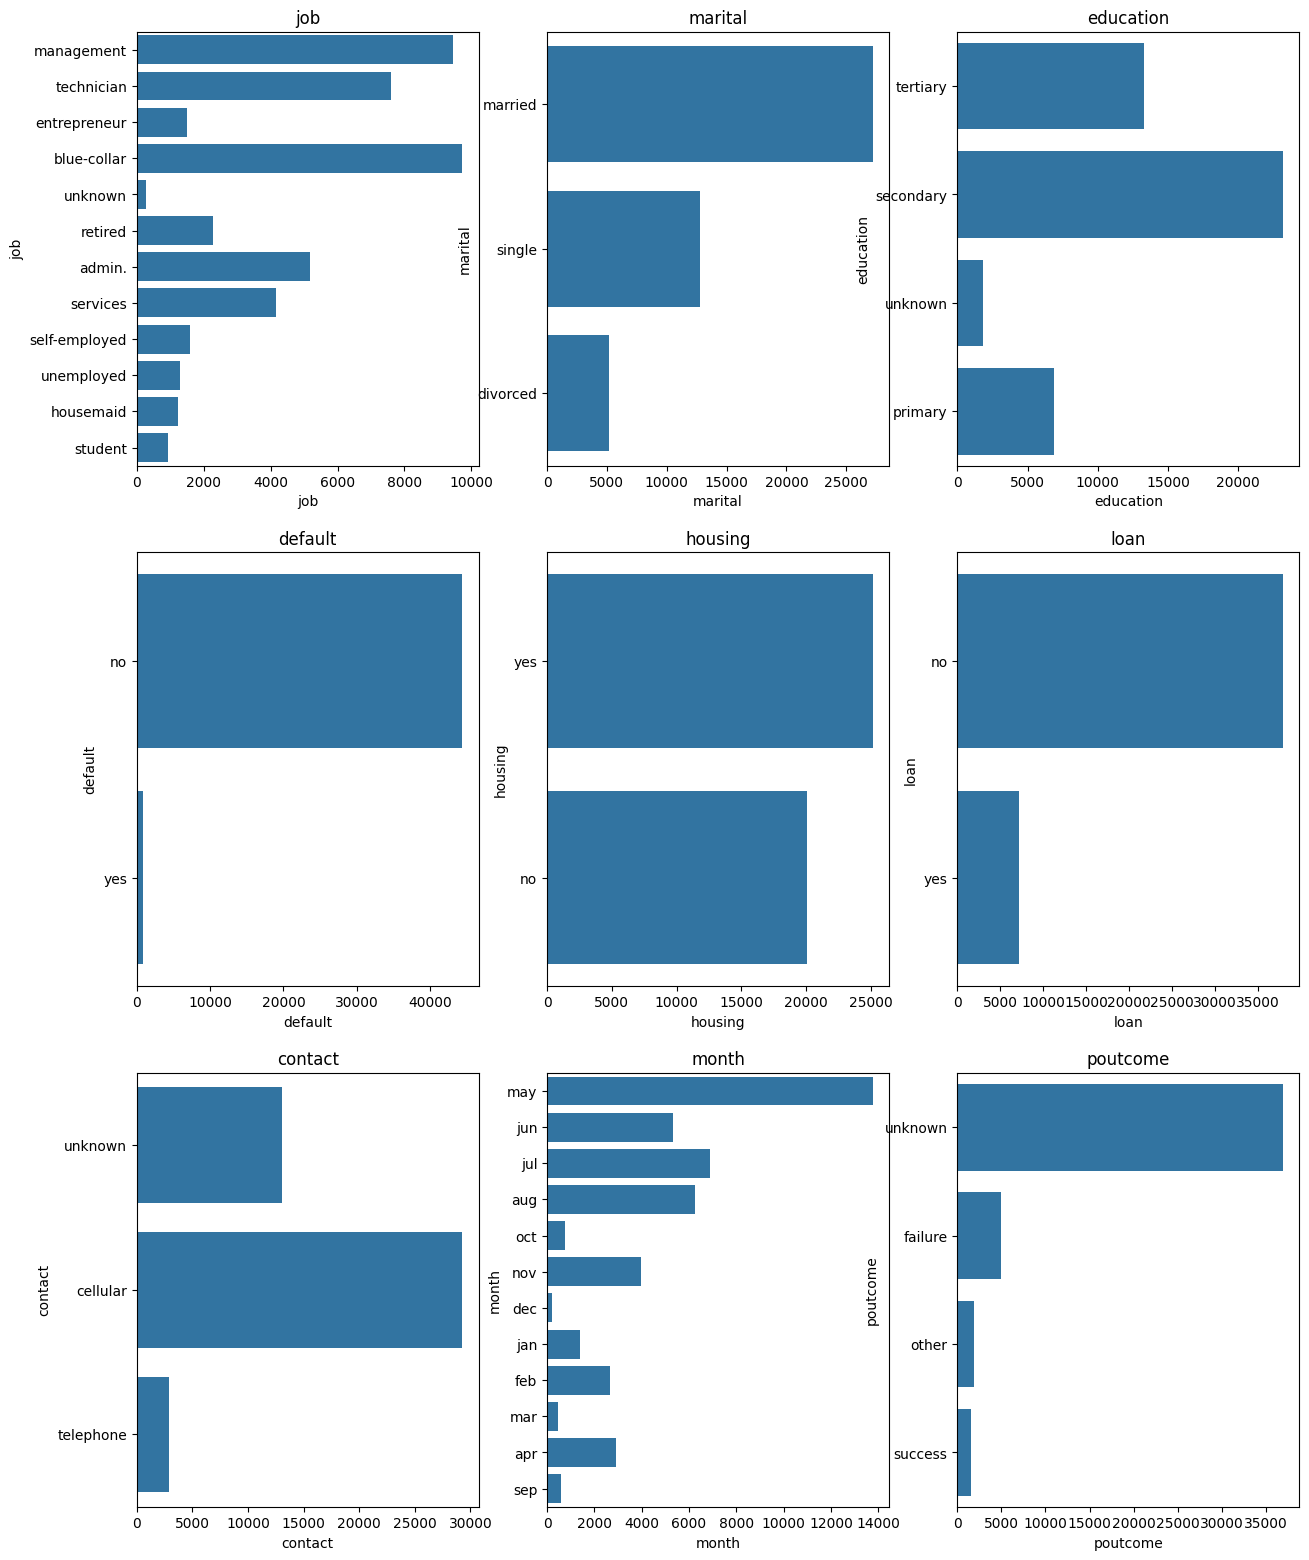

In [14]:
#finding the catogorical destribution
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for cat_feat in cat_feature:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat_feat,data=df)
    plt.xlabel(cat_feat)
    plt.title(cat_feat)
    plotnumber+=1
plt.show()
    

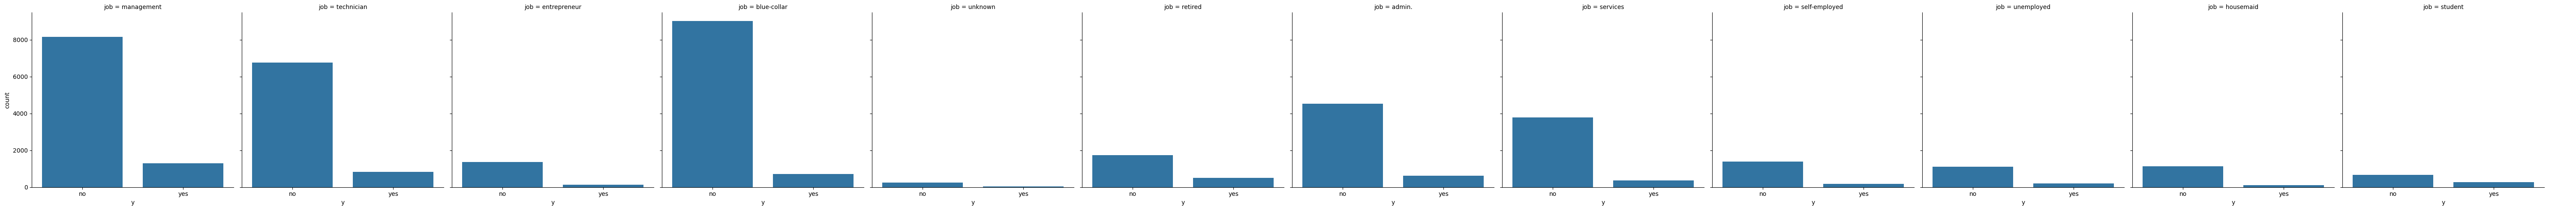

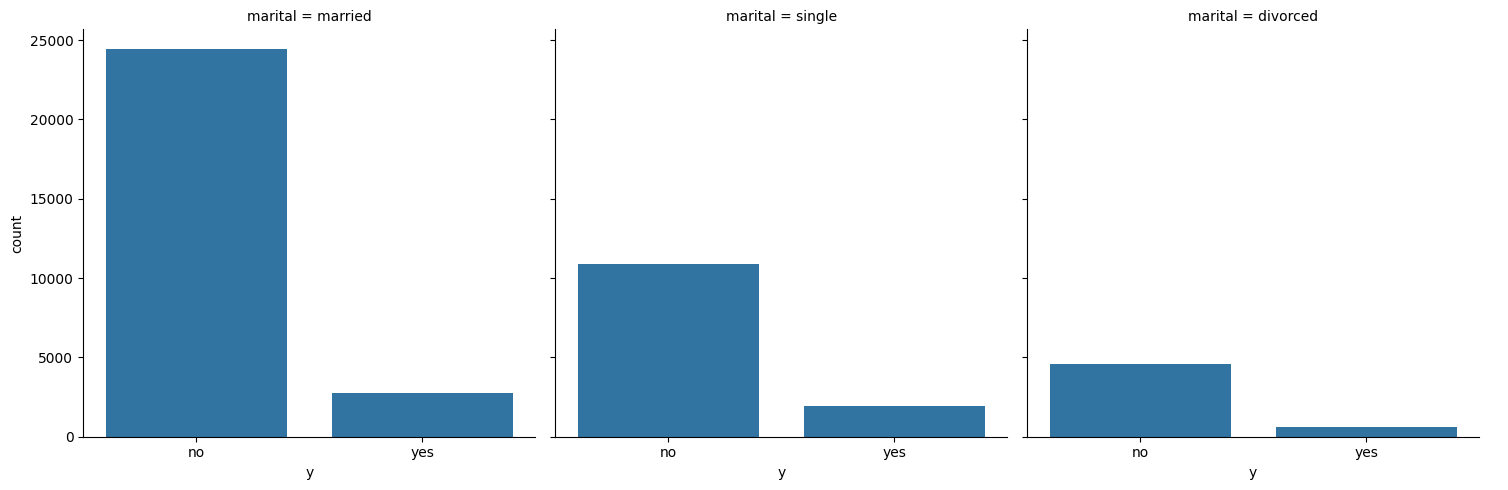

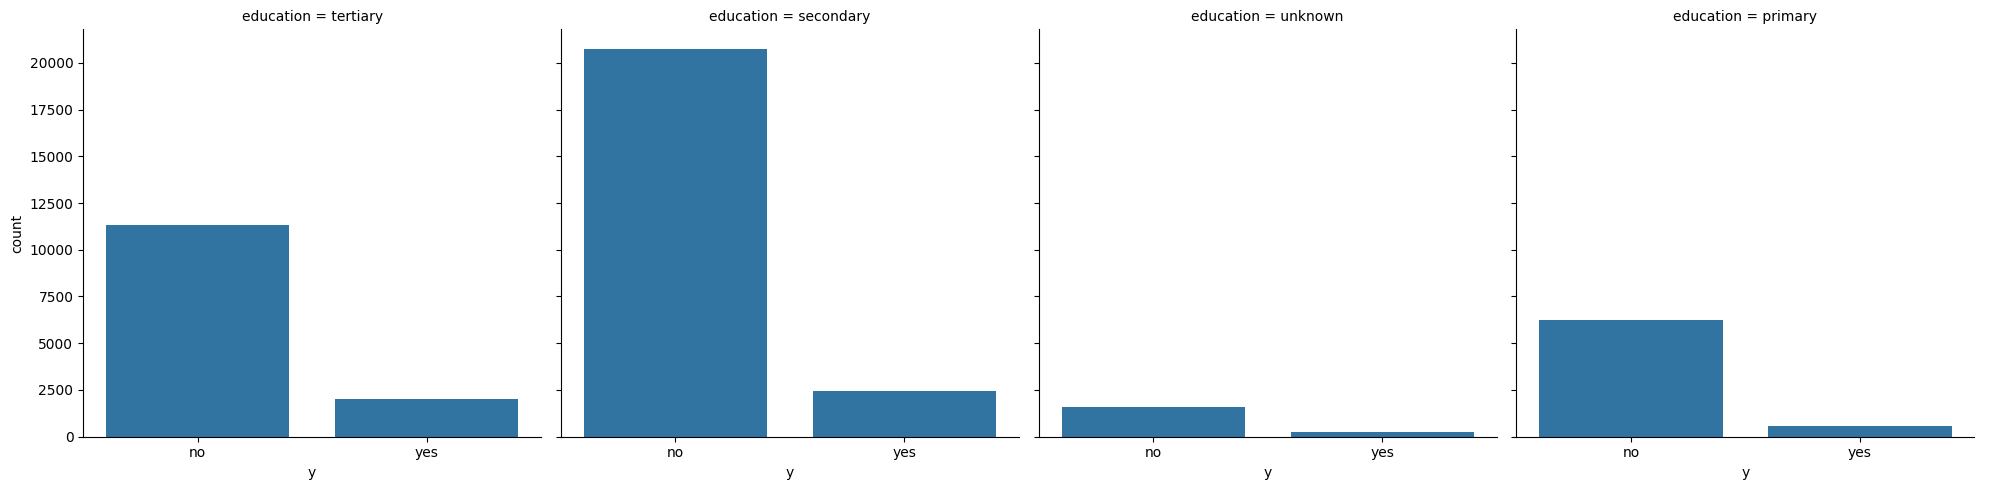

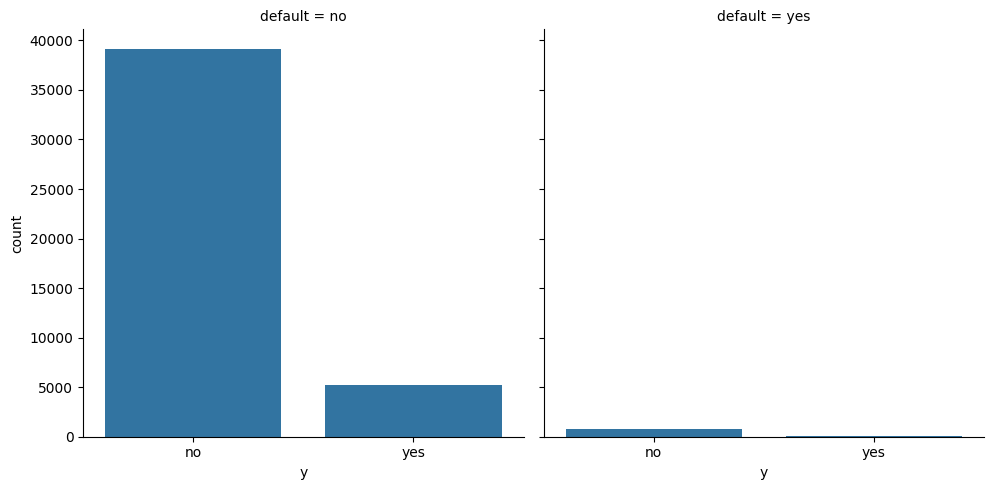

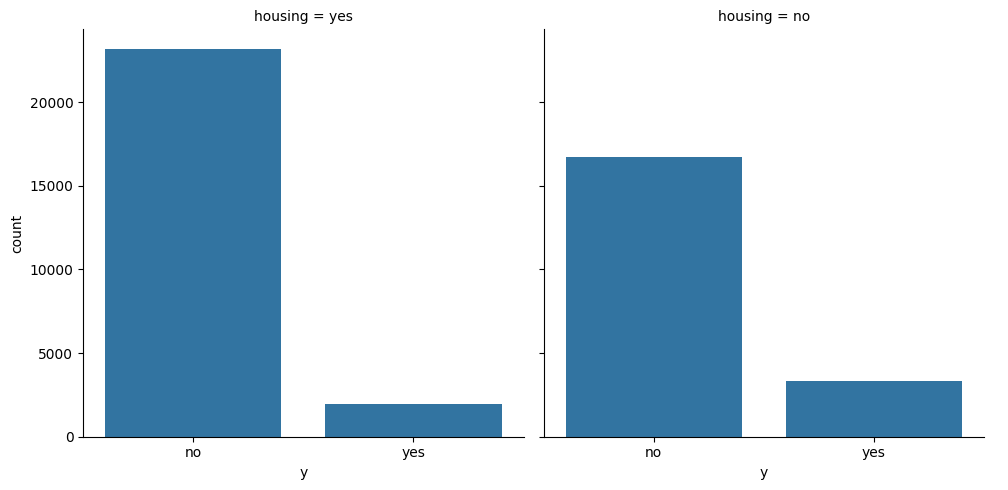

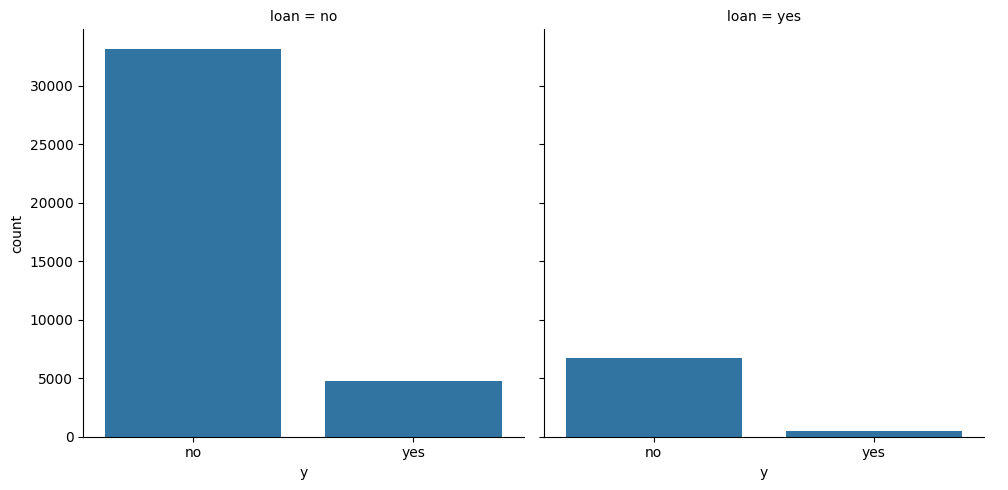

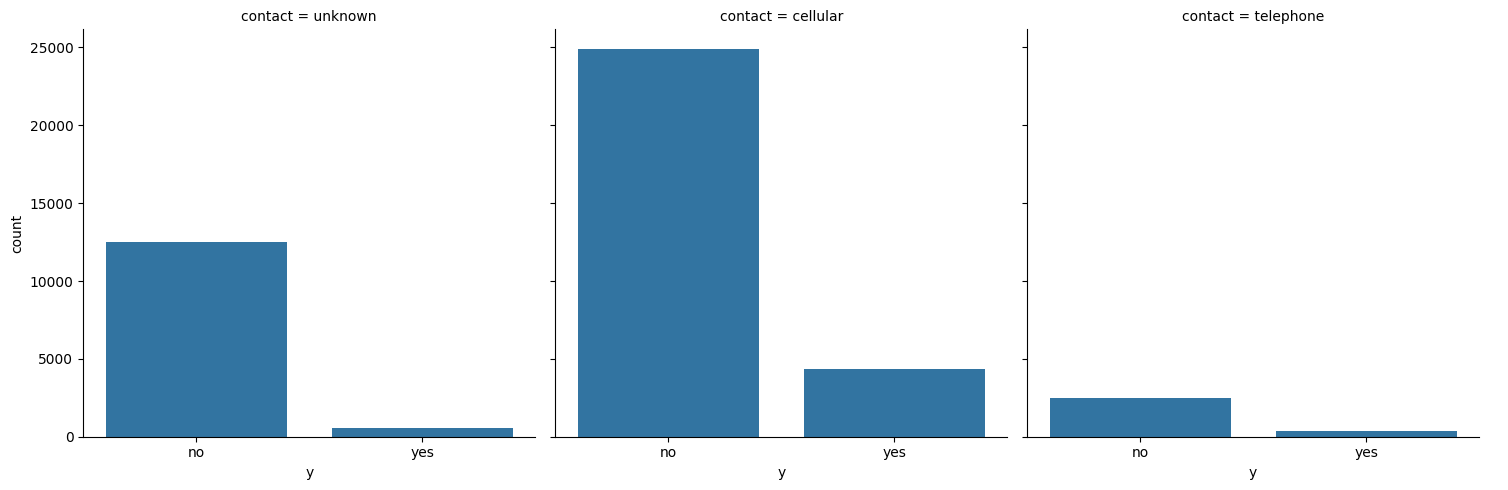

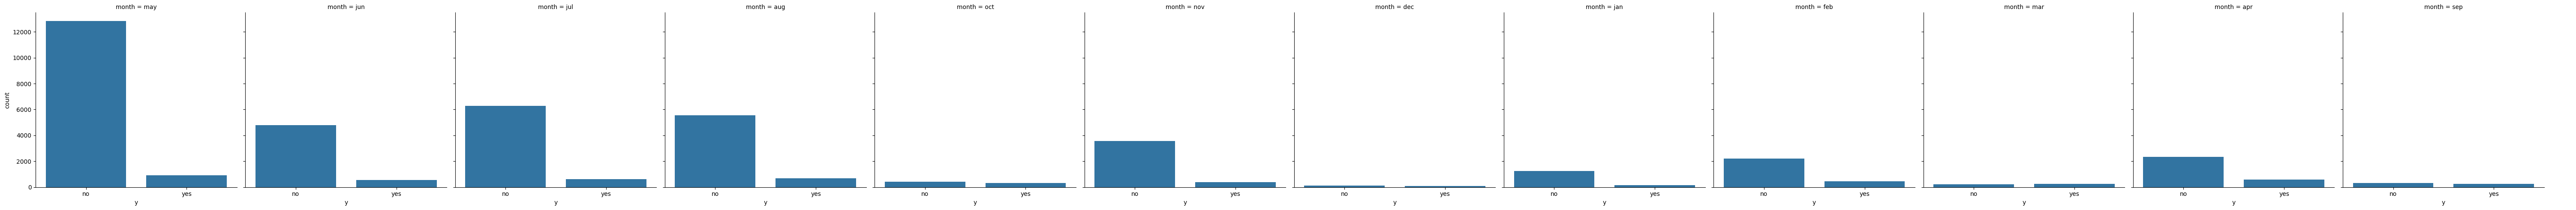

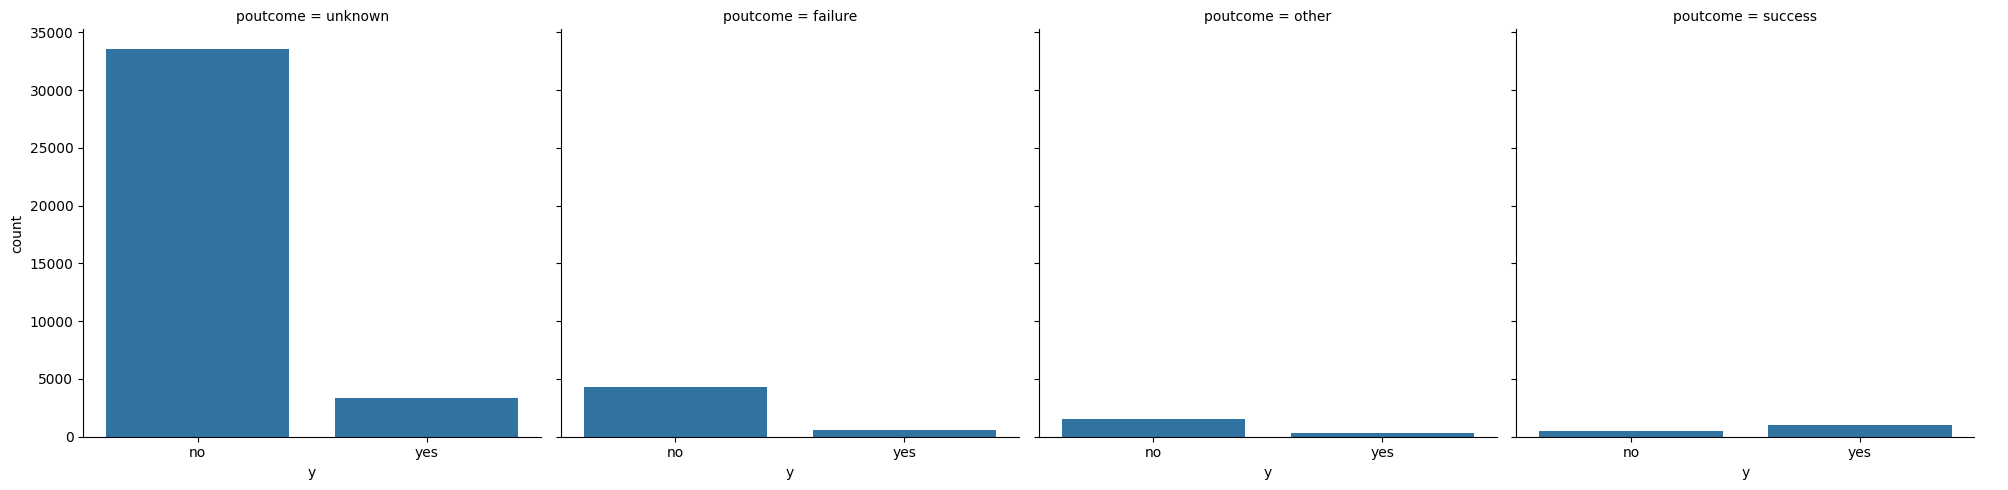

In [15]:
#relation b/w catogoricaland label
for cat_feat in cat_feature:
    sns.catplot(x='y',col=cat_feat,kind='count',data=df)
plt.show()

In [16]:
for cat_feat in cat_feature:
    print(df.groupby(['y',cat_feat]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

In [17]:
#explore numerical features

num_features=[feature for feature in df.columns if((df[feature].dtypes !='object') & (feature not in ['y']))]
print("number of variables",len(num_features))
df[num_features].head()

number of variables 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [18]:
# descrete numerical features 
desc_features=[feature for feature in num_features if len(df[feature].unique())<25]
print("descrete variable count:{}".format(len(desc_features)))


descrete variable count:0


In [19]:
# continuous numerical features 
cont_features=[feature for feature in num_features if feature not in desc_features+['y']]
print(" continuous variable count:{}".format(len(cont_features)))

 continuous variable count:7


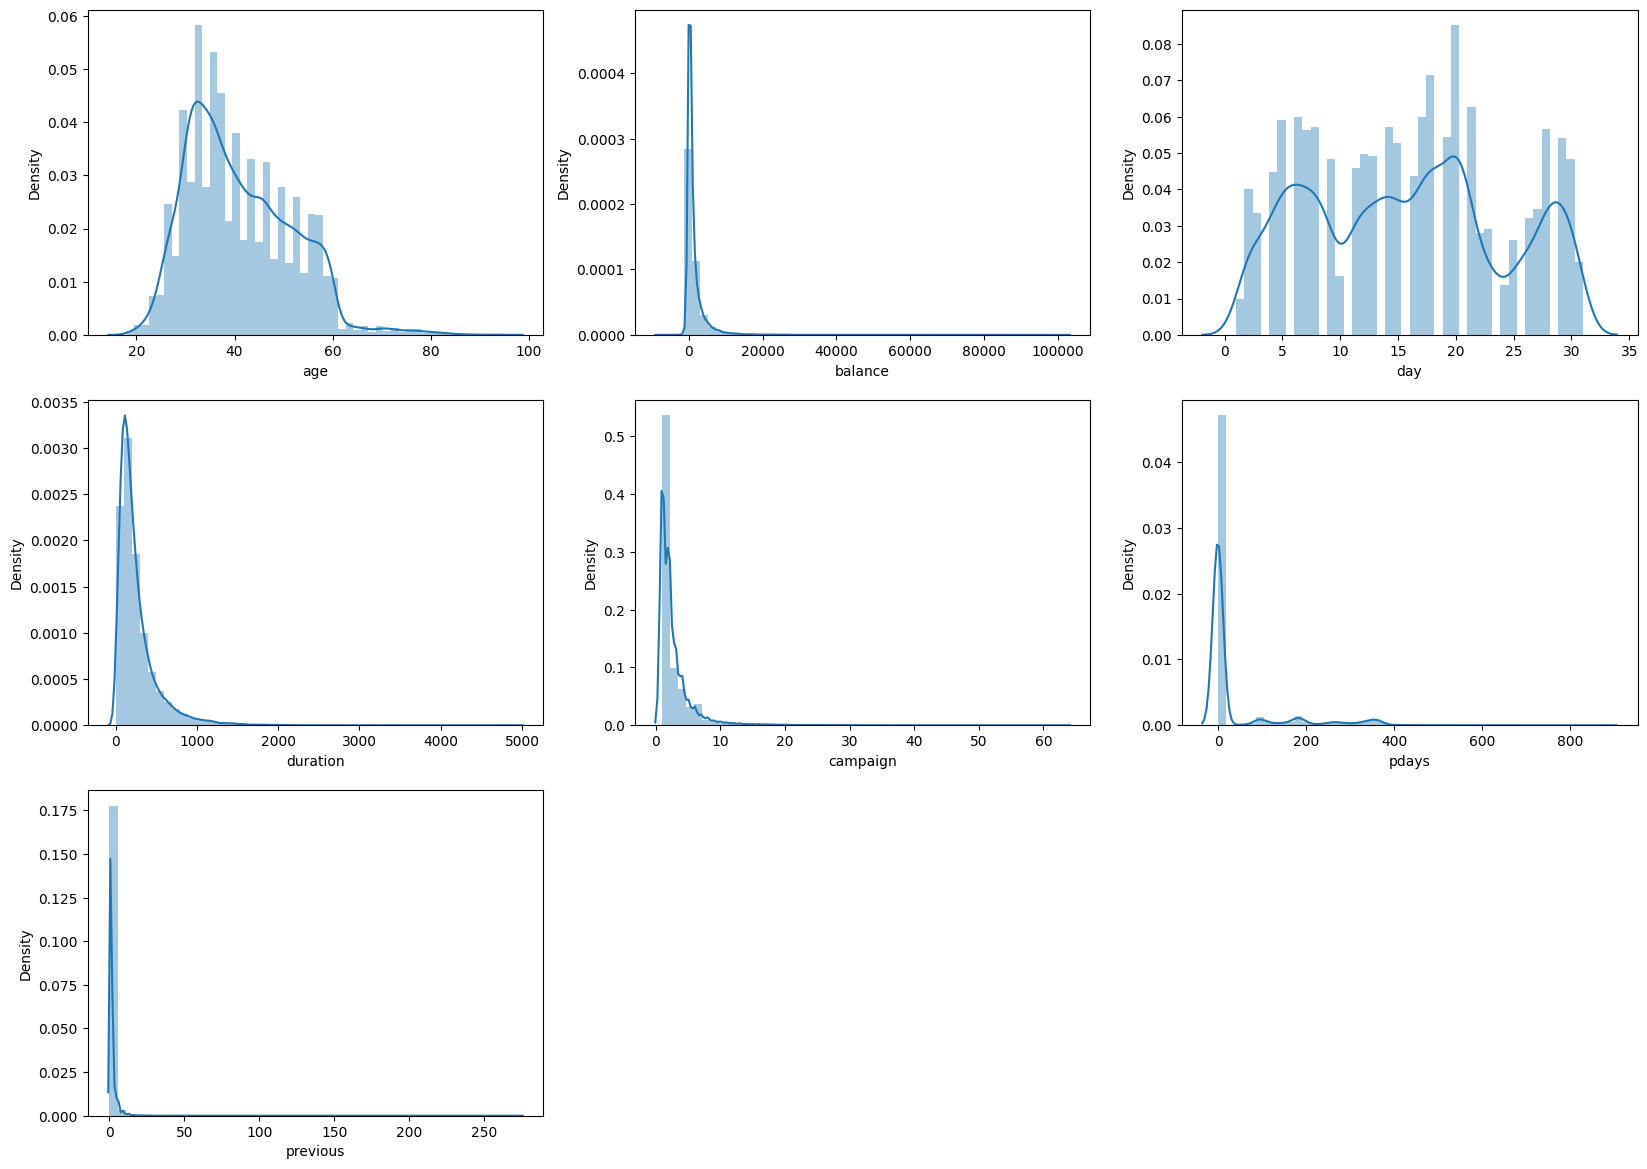

In [20]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for cont_feature in cont_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(df[cont_feature])
    plt.xlabel(cont_feature)
    plotnumber+=1
plt.show()

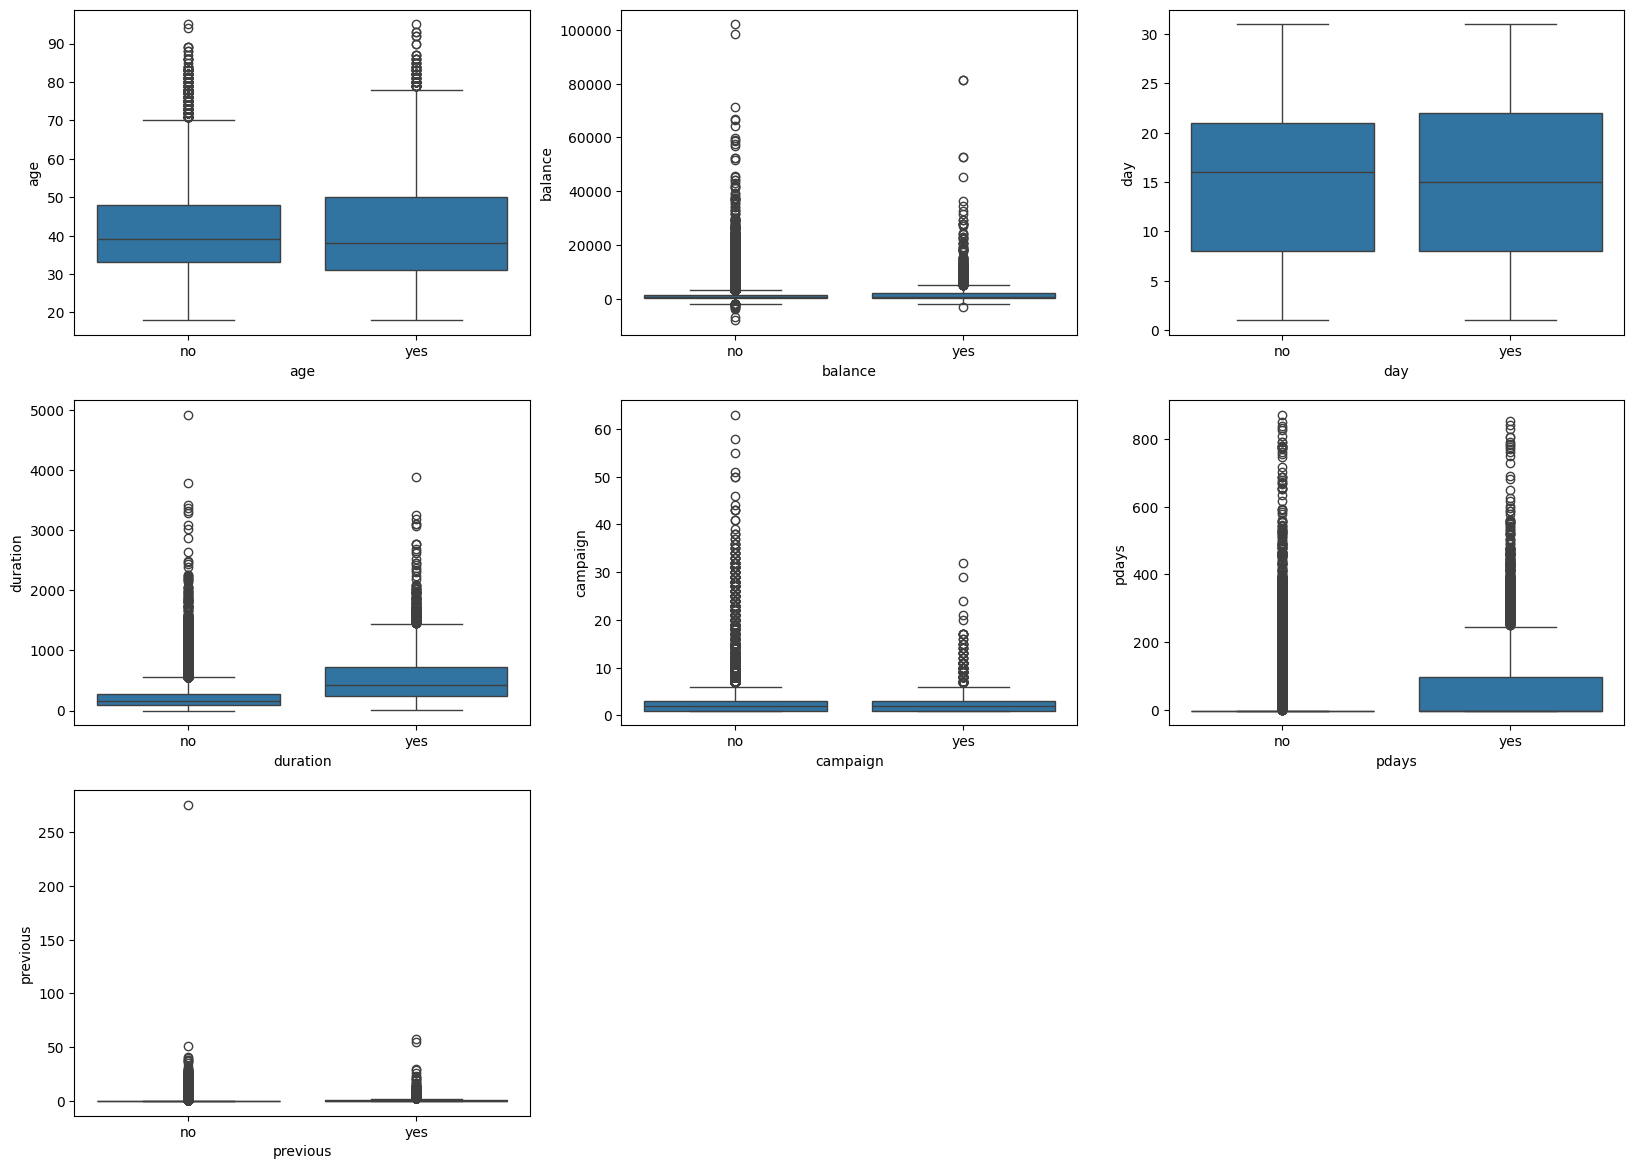

In [21]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for feature in cont_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x='y',y=df[feature],data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

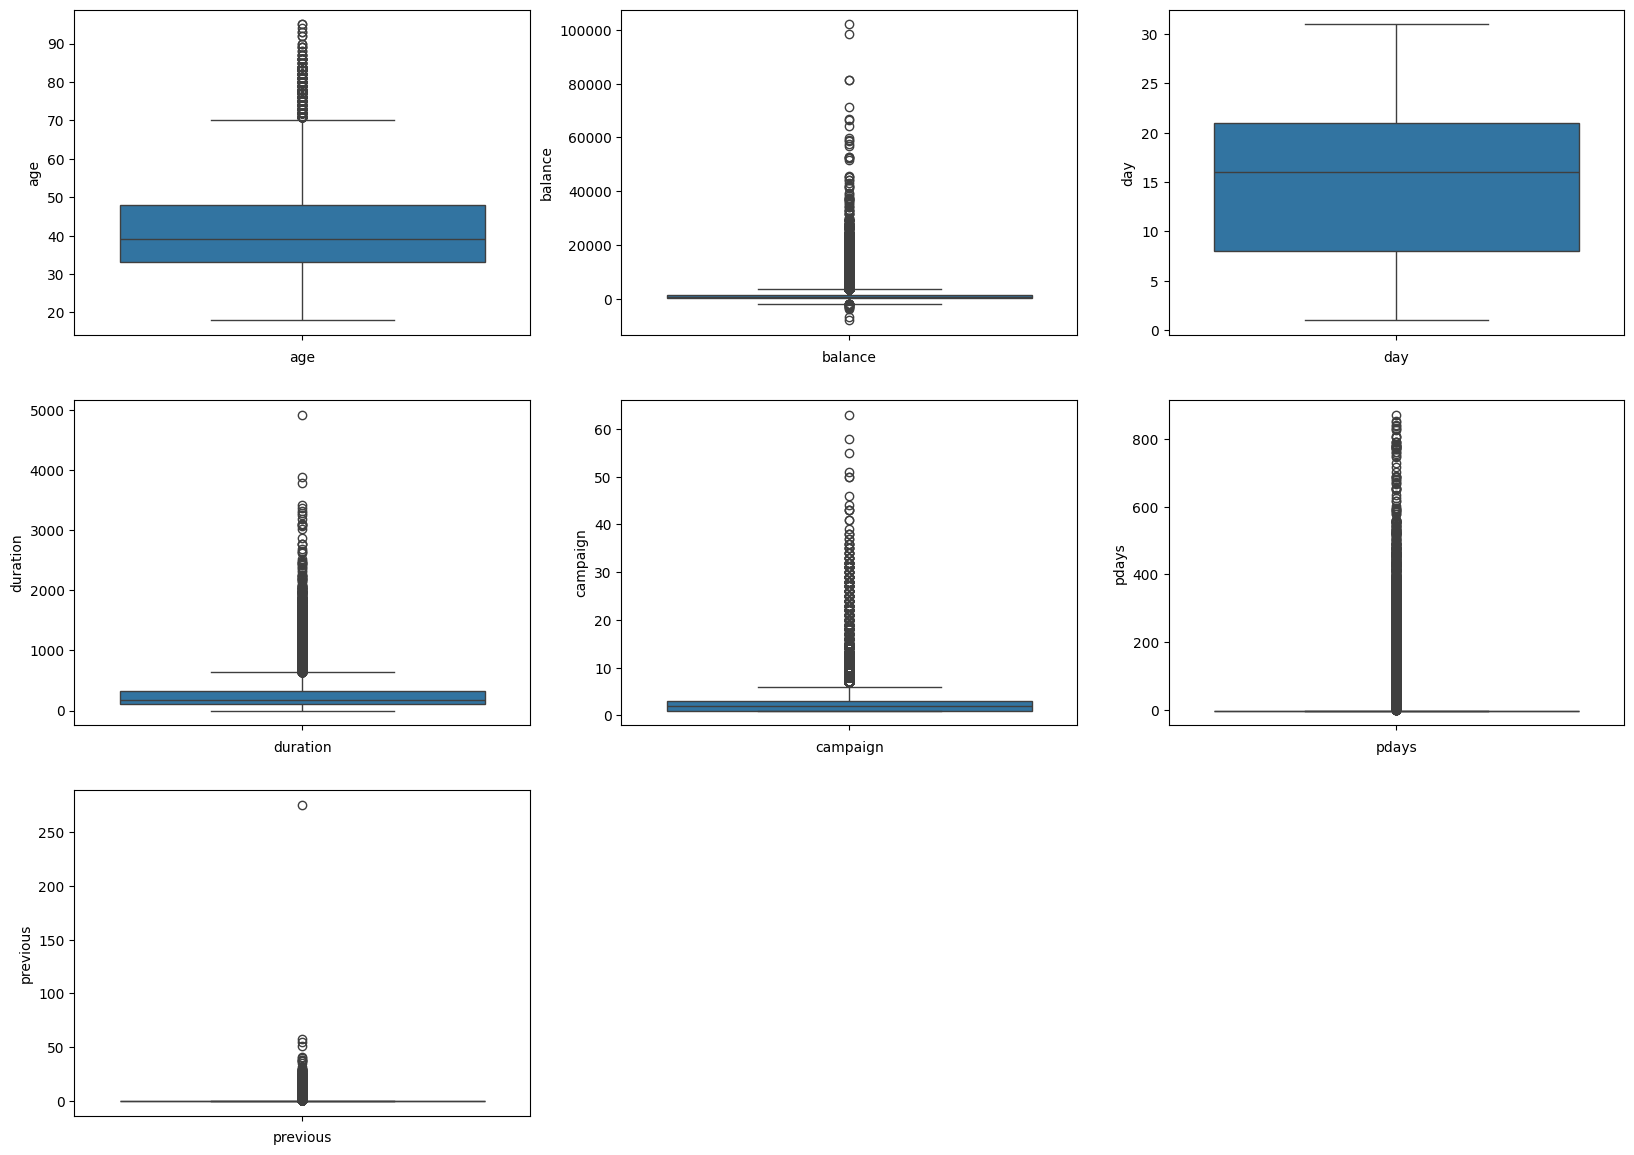

In [22]:
#find outliers in numerical features
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for num_feature in num_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df[num_feature])
    plt.xlabel(num_feature)
    plotnumber+=1
plt.show()

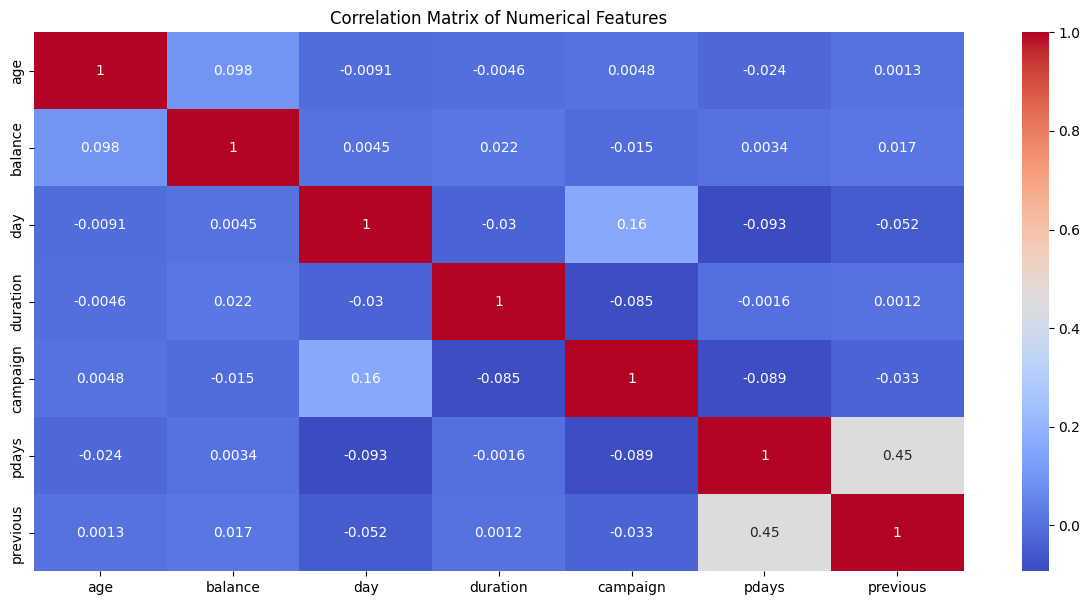

In [23]:
#explore correlation b/w numerical features
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
cor_mat = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()


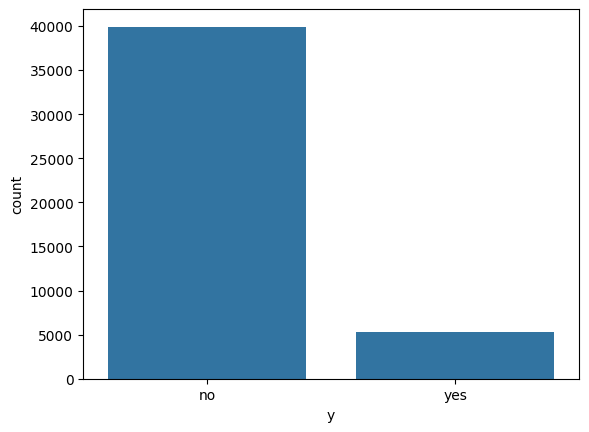

In [24]:
#check data set is balanced or not on target value in classification
sns.countplot(x='y',data=df)
plt.show()

In [25]:
df['y'].groupby(df['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

In [26]:
df2=df.copy()

In [27]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [28]:
df2.shape

(45211, 17)

In [29]:
df2.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [30]:
df2.drop(['default'],axis=1,inplace=True)

In [31]:
df2.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [32]:
df2.drop(['pdays'],axis=1,inplace=True)

In [33]:
df2.groupby(['y','age']).size()

y    age
no   18      5
     19     24
     20     35
     21     57
     22     89
            ..
yes  87      3
     90      2
     92      2
     93      2
     95      1
Length: 148, dtype: int64

In [34]:
df2.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

In [35]:
df2.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           15
                 ..
yes  3094         1
     3102         1
     3183         1
     3253         1
     3881         1
Name: duration, Length: 2627, dtype: int64

In [36]:

df2.groupby(['y', 'campaign'], sort=True)['campaign'].count()


y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [37]:
pd.set_option('display.max_rows', None)
df2.groupby(['y', 'previous'], sort=True)['previous'].count()

y    previous
no   0           33570
     1            2189
     2            1650
     3             848
     4             543
     5             338
     6             194
     7             151
     8              90
     9              68
     10             41
     11             50
     12             34
     13             29
     14             14
     15             19
     16             13
     17             12
     18              6
     19              9
     20              7
     21              3
     22              5
     23              7
     24              5
     25              4
     26              1
     27              5
     28              2
     29              3
     30              2
     32              1
     35              1
     37              2
     38              2
     40              1
     41              1
     51              1
     275             1
yes  0            3384
     1             583
     2             456
     3             2

In [38]:
df3=df2[df2['previous']<41]

In [39]:
pd.set_option('display.max_rows', None)
df3.groupby(['y', 'previous'], sort=True)['previous'].count()

y    previous
no   0           33570
     1            2189
     2            1650
     3             848
     4             543
     5             338
     6             194
     7             151
     8              90
     9              68
     10             41
     11             50
     12             34
     13             29
     14             14
     15             19
     16             13
     17             12
     18              6
     19              9
     20              7
     21              3
     22              5
     23              7
     24              5
     25              4
     26              1
     27              5
     28              2
     29              3
     30              2
     32              1
     35              1
     37              2
     38              2
     40              1
yes  0            3384
     1             583
     2             456
     3             294
     4             171
     5             121
     6              

In [40]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

for col in cat_columns:
    if col in df3.columns:
        # Fill NaN with a placeholder if needed to avoid issues
        df3[col] = df3[col].fillna('missing')

        # Generate dummies
        dummies = pd.get_dummies(df3[col], prefix=col, drop_first=True)

        # Drop the original column and add dummies
        df3 = pd.concat([df3.drop(col, axis=1), dummies], axis=1)
    else:
        print(f"Warning: Column '{col}' not found in dataframe.")


In [41]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [42]:
bool_columns=['housing','loan','y']
for col in bool_columns:
    df3[col+'_new']=df3[col].apply(lambda x : 1 if x=='yes' else 0)
    df3.drop(col,axis=1,inplace=True)


In [43]:
df3.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,y_new
0,58,2143,5,261,1,0,False,False,False,True,...,True,False,False,False,False,False,True,1,0,0
1,44,29,5,151,1,0,False,False,False,False,...,True,False,False,False,False,False,True,1,0,0
2,33,2,5,76,1,0,False,True,False,False,...,True,False,False,False,False,False,True,1,1,0
3,47,1506,5,92,1,0,True,False,False,False,...,True,False,False,False,False,False,True,1,0,0
4,33,1,5,198,1,0,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0


In [44]:
X=df3.drop(['y_new'],axis=1)
y=df3['y_new']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
len(X_train)

36164

In [46]:
len(X_test)

9042

In [47]:
#model Selction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    if name == "Naive Bayes":  # Naive Bayes works better without scaling
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.8985
Decision Tree Accuracy: 0.8705
Random Forest Accuracy: 0.9032
Support Vector Machine Accuracy: 0.8823
Naive Bayes Accuracy: 0.8609


In [48]:
#Model Building
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib  # For saving the model

# Step 1: Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred = rf_model.predict(X_test)

# Step 3: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9023446140234461

Confusion Matrix:
 [[7746  229]
 [ 654  413]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7975
           1       0.64      0.39      0.48      1067

    accuracy                           0.90      9042
   macro avg       0.78      0.68      0.71      9042
weighted avg       0.89      0.90      0.89      9042



In [51]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Step 1: Load the test dataset
test_df = pd.read_csv(r"C:\Users\sivap\Downloads\test.csv")

# Step 2: Preprocess test data (same steps as training)
# Assuming you used these transformations before:
# - Boolean conversion
# - One-hot encoding for categorical variables
# - Scaling

# Replace 'yes'/'no' with 1/0
bool_columns = ['housing', 'loan']
for col in bool_columns:
    test_df[col] = test_df[col].map({'yes': 1, 'no': 0})

# Convert 'y' column if it exists in test.csv
if 'y' in test_df.columns:
    test_df['y'] = test_df['y'].map({'yes': 1, 'no': 0})

# One-hot encoding for categorical columns
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
test_df = pd.get_dummies(test_df, columns=cat_columns, drop_first=True)

# Align test data with training features (important!)
X_test_final = test_df.reindex(columns=X_train.columns, fill_value=0)

# Step 3: Scale the features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_final)  # ⚠️ Use the SAME scaler if saved, or fit if this is okay for you

# Step 4: Load the model
rf_model = joblib.load('random_forest_model.pkl')

# Step 5: Predict
predictions = rf_model.predict(X_test_scaled)
res=test.copy()
res['y'] = ['Subscribed' if p == 1 else 'Not Subscribed' for p in predictions]

# Step 6: Output predictions
print(res[['age', 'y']])


      age               y
0      30  Not Subscribed
1      33  Not Subscribed
2      35  Not Subscribed
3      30  Not Subscribed
4      59  Not Subscribed
5      35  Not Subscribed
6      36  Not Subscribed
7      39  Not Subscribed
8      41  Not Subscribed
9      43  Not Subscribed
10     39  Not Subscribed
11     43  Not Subscribed
12     36  Not Subscribed
13     20  Not Subscribed
14     31  Not Subscribed
15     40  Not Subscribed
16     56  Not Subscribed
17     37  Not Subscribed
18     25  Not Subscribed
19     31  Not Subscribed
20     38  Not Subscribed
21     42  Not Subscribed
22     44  Not Subscribed
23     44  Not Subscribed
24     26  Not Subscribed
25     41  Not Subscribed
26     55  Not Subscribed
27     67  Not Subscribed
28     56  Not Subscribed
29     53  Not Subscribed
30     68  Not Subscribed
31     31  Not Subscribed
32     59  Not Subscribed
33     32  Not Subscribed
34     49  Not Subscribed
35     42  Not Subscribed
36     78  Not Subscribed
37     32  N

In [52]:
# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("\n✅ Model saved as 'random_forest_model.pkl'")


✅ Model saved as 'random_forest_model.pkl'


In [58]:
import pickle

# After training your model
features = list(X.columns)  # Save this

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump((model, features), f)